##Data Loading and Visualization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Decision Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/WorkSpace2/GIT/Machine_Learning/Tree_Regression/Position_Salaries.csv')
print(len(dataset))
dataset.head(5)

10


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(X,y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


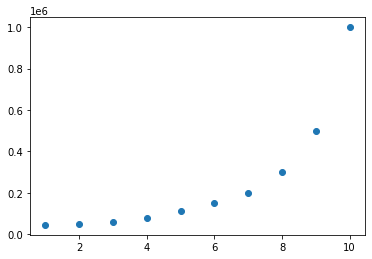

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X,y) 

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)'

##Decision Tree

In [29]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [31]:
# Predicting a new result
y_pred = DTR.predict(X_test)
print(y_pred,y_test)
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y_test,y_pred))

[ 50000. 300000.] [ 60000 500000]
r2_score: 0.5857438016528926


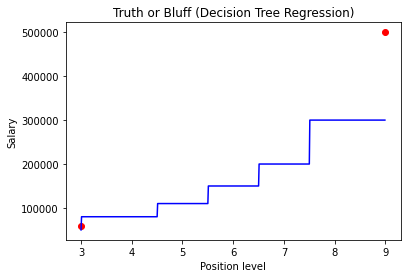

In [21]:
X=X_test
y=y_test
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, DTR.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

##Random Forest

In [23]:
# Fitting Random Forest Regression to the dataset

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [35]:
# Predicting a new result
y_pred = RFR.predict(X_test)
print(y_pred,y_test)
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y_test,y_pred))

[ 59000. 440000.] [ 60000 500000]
r2_score: 0.9627995867768595


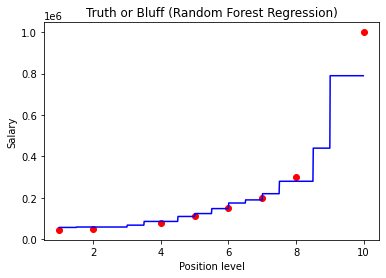

In [26]:
# Visualising the Random Forest Regression results (higher resolution)
X=X_train
y=y_train
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, RFR.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#in this case Random Forest is much more accurate than Decision Tree.